In [ ]:
import pandas as pd
price_det = pd.read_csv('/content/regression_for_price.csv',thousands=',')
price_det.head()
price_det = price_det.reset_index() 

In [ ]:
import statsmodels.api as sm
import numpy as np
# price_det = price_det.astype(int)
#'Export Value', 'Production'
x = price_det[['Area',		'Yield',  'Export Qty.',	'Export Per/Kg Cost',	'Qt. Sold at Auction']]
y = price_det['Price/Kg At Auction']
print(x)
# with sklearn
# regr = linear_model.LinearRegression()
# # regr.fit(x, y)

# print('Intercept: \n', regr.intercept_)
# print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
# print(price_det.dtypes)
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)


In [5]:
import pandas as pd
price_det = pd.read_csv('/content/e_auction_regress_final (3).csv',thousands=',')

price_det.head()
price_det.columns = price_det.columns.str.replace(' ', '')
price_det.columns = price_det.columns.str.replace('.', '')
price_det.columns = price_det.columns.str.replace('-', '')
price_det.columns = price_det.columns.str.replace('(', '')
price_det.columns = price_det.columns.str.replace(')', '')

price_det.head()


<ipython-input-5-5c3f845128ba>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  price_det.columns = price_det.columns.str.replace('.', '')
<ipython-input-5-5c3f845128ba>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  price_det.columns = price_det.columns.str.replace('(', '')
<ipython-input-5-5c3f845128ba>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  price_det.columns = price_det.columns.str.replace(')', '')


,Unnamed:0,SaleNo,LotsOffered,QuantityofTeaSoldThKgs,AveragePriceRs,EAuction
0,0,1.0,3475,2538.11,116.88,0
1,1,2.0,3382,2606.86,116.74,0
2,2,3.0,3578,2809.28,115.10,0
3,3,4.0,3545,2713.73,113.55,0
4,4,5.0,3219,2324.31,110.59,0


In [ ]:
# for index, row in price_det.iterrows():
#     if row['EAuction'] == 0:
#        row['Price/Kg At Auction'] = row['AveragePriceRs'] + 80.12
# price_det.head()
price_det.loc[price_det["EAuction"] == 1, 'AveragePriceRs'] += 10.12

In [2]:
from statsmodels.formula.api import ols

model = ols('AveragePriceRs ~ LotsOffered + QuantityofTeaSoldThKgs +  C(EAuction)', data=price_det).fit()


In [ ]:
model.summary()

In [ ]:
non_eauc = price_det.drop(price_det.index[price_det['EAuction'] == 1])



In [ ]:
e_auc = price_det.drop(price_det.index[price_det['EAuction'] == 0])


In [6]:
price_det.to_csv('e_auction_regress_final.csv') 

In [ ]:
def av(lst):
    return sum(lst) / len(lst)


In [ ]:
e_auc_bids = list(e_auc['AveragePriceRs'])
ne_auc_bids = list(non_eauc['AveragePriceRs'])
av(e_auc_bids)

173.7620716412214

In [ ]:
av(ne_auc_bids)

143.77618051807227

In [ ]:
kde = sm.nonparametric.KDEUnivariate(e_auc_bids)
kde.fit()  # Estimate the densities
kde_non_e = sm.nonparametric.KDEUnivariate(ne_auc_bids)
kde_non_e.fit()  # Estimate the densities


In [ ]:
len(non_eauc.head())
e_auc

,SaleNo,LotsOffered,QuantityofTeaSoldThKgs,AveragePriceRs,EAuction,Japanese
48,1.0,1481,920.470000,95.820000,1,0
49,2.0,1688,1044.380000,97.560000,1,0
50,3.0,1833,1044.130000,101.530000,1,0
51,4.0,1230,740.420000,106.350000,1,0
52,5.0,1768,815.530000,107.310000,1,0
...,...,...,...,...,...,...
290,NaN,1463,1663.322699,264.922026,1,1
291,NaN,1070,1592.184887,245.993298,1,1
293,NaN,1170,2044.689284,10.120000,1,1
295,NaN,1139,2573.258390,242.332968,1,1


In [ ]:
%matplotlib inline
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.distributions.mixture_rvs import mixture_rvs


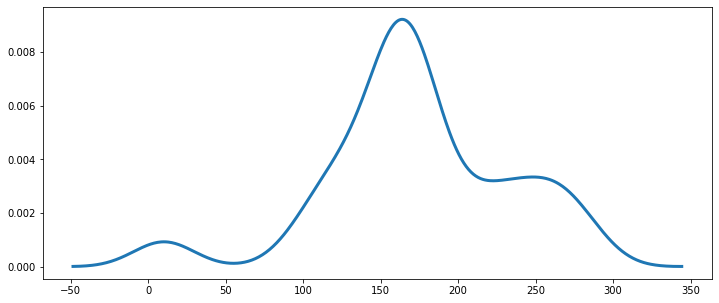

In [ ]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

ax.plot(kde.support, kde.density, lw=3, label="KDE from samples", zorder=10)
# lines = ax.hist(ne_auc_bids, bins=20, edgecolor="k", label="Histogram")


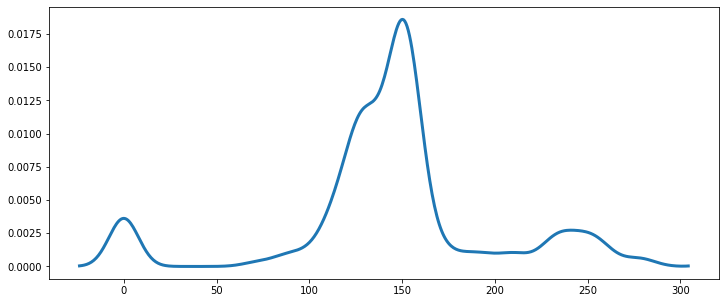

In [ ]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

ax.plot(kde_non_e.support, kde_non_e.density, lw=3, label="KDE from samples", zorder=10)


In [ ]:
from scipy.stats import wasserstein_distance
wasserstein_distance(kde_non_e.support, kde.support)

17.15827428836638